<a href="https://colab.research.google.com/github/dhyannnn/2030-Assignments/blob/main/Exercise%2025%20-%20Three-body%20problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Dhyan Thakkar__
<br>
Date: Mar. 16, 2022
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 25: Three-body problem</font></center>

## <font color=#46769B>Introduction</font>

The goals of this exercise are:
- Gain experience with using leapfrog methods for $n$-body problems

Required reading:
- *Lesson 11: Leapfrog method*


## <font color=#46769B>Exercise: Part (a)</font>

While three-body dynamics is generally chaotic, there exist some special orbits that are periodic, with unusual trajectories. Perform a simulation of the following initial conditions for three bodies of equal mass $m$:
$$\mathbf{r}_1(0) = \left(0.97000436, \, -0.24308753, \, 0 \right), \quad 
\mathbf{r}_2(0) = - \mathbf{r}_1(0), \quad \mathbf{r}_3(0) = (0, \, 0, \, 0) \, ,$$
and
$$\mathbf{v}_3(0) = \left(-0.93240737, \, -0.86473146, \, 0\right) , \quad \mathbf{v}_1(0) = \mathbf{v}_2(0) = -\tfrac{1}{2} \mathbf{v}_3(0) \, .$$
This trajectory is an example of a *choreographic orbit* in which all $n$ bodies follow the same trajectory, and was originally discovered by C. Moore (see [here](https://sites.santafe.edu/~moore/gallery.html) and references therein, as well as [here](https://dangries.com/rectangleworld/demos/nBody/) for some nice animations).

In this work, perform your simulation setting $G=1$ and $m=1$.

Perform the following tasks:
- Write a code to solve for $\mathbf{r}_1(t)$, $\mathbf{r}_2(t)$, and $\mathbf{r}_3(t)$ using the leapfrog method, implementing the acceleration function given above, for time $t$ the range $[0,1000]$, with $N=10^5$ steps.
- Make a movie of your simulation, using the `celluloid` package, showing the masses as points that move in the $x$-$y$ plane as a function of time.

For your movie, it is important that the $x$ and $y$ dimensions are shown on the same scale. This means:
- Make your plot __square__ using the keyword `figsize=(8,8)`
- Explicitly set `plt.xlim([xmin,xmax])` and `plt.ylim([ymin,ymax])` to set the $x$ and $y$ axis ranges. The ranges for both axes must span the same amount, i.e. `xmax-xmin` $=$ `ymax-ymin` so that the neither direction is squashed or stretched with respect to the other.

See Exercise 24 solutions for an example on how to do all this. Lastly, note that since motion is purely in the $x$-$y$ plane, you need only consider 2D motion, not the full 3D motion.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

G = 1
m = 1

r1_0 = np.array([0.97000436, -0.24308753,0])
r2_0 = -r1_0
r3_0 = np.array([0,0,0])

v3_0 = np.array([-0.93240737, -0.86473146,0])
v1_0 = -0.5*v3_0
v2_0 = -0.5*v3_0

def leapfrog_method(num_steps):

    m1, m2, m3 = 1, 1, 1
    masses = np.array([m1,m2,m3])
    
    def a(t,r):

        # number of bodies
        n = 3
        
        # Unpack r into r[0], r[1], r[2]
        r_vec = np.reshape(r,(n,3))

        # Calculate a_ij = acceleration on mass i due to mass j
        a_vec = np.zeros((n,3))
        for i in range(n):
            for j in range(i+1,n):
                
                # Relative positions r_ji = r_vec[j] - r_vec[i]
                r_ji = r_vec[j] - r_vec[i]
                r_ji_mag = np.linalg.norm(r_ji)
                
                terms = G*r_ji/r_ji_mag**3
                
                a_vec[i] += masses[j] * terms
                a_vec[j] += - masses[i] * terms
                
        # Combine and return a = (a1, a2)
        return np.concatenate(a_vec) 

    # Initialize steps
    t0, tf = 0, 1000
    t = np.linspace(t0,tf,num=num_steps+1)
    h = t[1] - t[0]

    # Initialize r, v, a
    r0 = np.concatenate((r1_0,r2_0,r3_0))
    r = np.zeros((num_steps+1,9))
    r[0] = r0

    v0 = np.concatenate((v1_0,v2_0,v3_0))
    v = np.zeros((num_steps+1,9))
    v[0] = v0
    
    ai = a(t0,r0)

    # Leapfrog algorithm
    for i in range(num_steps):
        v_half = v[i] + h/2 * ai
        r[i+1] = r[i] + h*v_half
        ai = a(t[i+1],r[i+1])
        v[i+1] = v_half + h/2 * ai

    return t, r, v


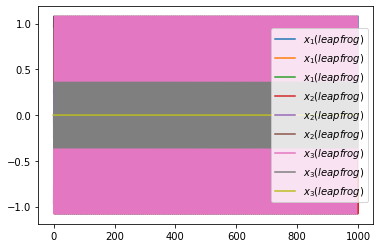

In [8]:
t, r, v = leapfrog_method(10**5)
r1 = r[:,0:3]
r2 = r[:,3:6]
r3 = r[:,6:9]
plt.plot(t,r1,label=r'$x_1 (leapfrog)$')
plt.plot(t,r2,label=r'$x_2 (leapfrog)$')
plt.plot(t,r3,label=r'$x_3 (leapfrog)$')

plt.legend()
plt.show()

In [12]:
!pip install celluloid 
from celluloid import Camera
from IPython.display import HTML
num_steps = 10**5
x1, y1 = r[:,0], r[:,1]
x2, y2 = r[:,3], r[:,4]
x3, y3 = r[:,6], r[:,7]

# It is faster not to plot every single time step ti
# Delta_steps tells you how many steps to skip each frame
Delta_steps = 100

# Now make the animation
# Initialization
fig = plt.figure(figsize=(8,8))
camera = Camera(fig)

# Loop through your steps and make a plot each time
for i in range(0,num_steps+1,Delta_steps):
    plt.plot(x1[i],y1[i],'r.')
    plt.plot(x2[i],y2[i],'g.')
    plt.plot(x3[i],y3[i],'k.')
    plt.xlim([-1.25,1.25])
    plt.ylim([-1.25,1.25])
    camera.snap()

# Make your animation
# interval = time between frames in ms
animation = camera.animate(interval=50)

# Do this, otherwise it will plot the usual static plot too
plt.close()

# Show your animation!
HTML(animation.to_html5_video())

## <font color=#46769B>Exercise: Part (b)</font>

Repeat the previous example, but change the initial conditions from Part (a) a little bit in any way you want. There is no specific thing you need to prove, but try some other initial conditions and make a new animation of your simulation. The goal is just to explore and see what comes out. If you find something exciting, save your movie and post it on Slack.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

G = 1
m = 1

#Change in r3_0
r1_0 = np.array([0.97000436, -0.24308753,0])
r2_0 = -r1_0
r3_0 = 3*r1_0

#Change in v2_0
v3_0 = np.array([-0.93240737, -0.86473146,0])
v1_0 = -0.5*v3_0
v2_0 = 0.5*v3_0

def leapfrog_method2(num_steps):
    # Change in masses
    m1, m2, m3 = 1, 2, 3
    masses = np.array([m1,m2,m3])
    
    def a(t,r):

        # number of bodies
        n = 3
        
        # Unpack r into r[0], r[1], r[2]
        r_vec = np.reshape(r,(n,3))

        # Calculate a_ij = acceleration on mass i due to mass j
        a_vec = np.zeros((n,3))
        for i in range(n):
            for j in range(i+1,n):
                
                # Relative positions r_ji = r_vec[j] - r_vec[i]
                r_ji = r_vec[j] - r_vec[i]
                r_ji_mag = np.linalg.norm(r_ji)
                
                terms = G*r_ji/r_ji_mag**3
                
                a_vec[i] += masses[j] * terms
                a_vec[j] += - masses[i] * terms
                
        # Combine and return a = (a1, a2)
        return np.concatenate(a_vec) 

    # Initialize steps
    t0, tf = 0, 1000
    t = np.linspace(t0,tf,num=num_steps+1)
    h = t[1] - t[0]

    # Initialize r, v, a
    r0 = np.concatenate((r1_0,r2_0,r3_0))
    r = np.zeros((num_steps+1,9))
    r[0] = r0

    v0 = np.concatenate((v1_0,v2_0,v3_0))
    v = np.zeros((num_steps+1,9))
    v[0] = v0
    
    ai = a(t0,r0)

    # Leapfrog algorithm
    for i in range(num_steps):
        v_half = v[i] + h/2 * ai
        r[i+1] = r[i] + h*v_half
        ai = a(t[i+1],r[i+1])
        v[i+1] = v_half + h/2 * ai

    return t, r, v


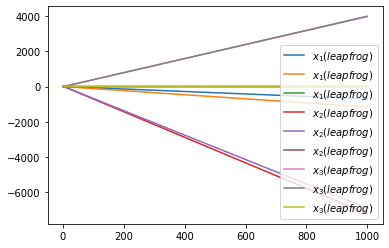

In [15]:
t_2, r_2, v_2 = leapfrog_method2(10**5)
r1 = r_2[:,0:3]
r2 = r_2[:,3:6]
r3 = r_2[:,6:9]
plt.plot(t,r1,label=r'$x_1 (leapfrog)$')
plt.plot(t,r2,label=r'$x_2 (leapfrog)$')
plt.plot(t,r3,label=r'$x_3 (leapfrog)$')

plt.legend()
plt.show()

In [25]:
!pip install celluloid 
from celluloid import Camera
from IPython.display import HTML
num_steps = 10**5
x1_2, y1_2 = r_2[:,0], r_2[:,1]
x2_2, y2_2 = r_2[:,3], r_2[:,4]
x3_2, y3_2 = r_2[:,6], r_2[:,7]

# It is faster not to plot every single time step ti
# Delta_steps tells you how many steps to skip each frame
Delta_steps = 100

# Now make the animation
# Initialization
fig2 = plt.figure(figsize=(8,8))
camera2 = Camera(fig2)

# Loop through your steps and make a plot each time
for i in range(0,num_steps+1,Delta_steps):
    plt.plot(x1_2[i],y1_2[i],'r.')
    plt.plot(x2_2[i],y2_2[i],'g.')
    plt.plot(x3_2[i],y3_2[i],'k.')
    plt.xlim([-100,100])
    plt.ylim([-100,100])
    camera2.snap()

# Make your animation
# interval = time between frames in ms
animation2 = camera2.animate(interval=50)

# Do this, otherwise it will plot the usual static plot too
plt.close()

# Show your animation!
HTML(animation2.to_html5_video())